In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [80]:
train_dataset = torchvision.datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)

In [81]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [82]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [83]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [84]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [85]:
test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform=transforms.ToTensor(), download=True)

In [86]:
test_dataset.targets.shape

torch.Size([10000])

In [87]:
# Build Model

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10))

In [88]:
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [89]:
# Check for and connect to GPU

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [90]:
# Loss and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [91]:
# Instantiate data loader for batch processing

batch_size = 128

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [92]:
# Check out what the data loader does
# maps the values to (0, 1)
# makes the data of shape (batch size, color, height, width)

tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=1, 
                                           shuffle=True)
for x, y in tmp_loader:
  print(x)
  print(x.shape)
  print(y.shape)
  break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [93]:
# Train Model

n_epochs = 10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
iterations = 0

for it in range(n_epochs):
  iterations += 1
  train_loss = []
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)  # reshape inputs to N x D
    optimizer.zero_grad()  # zero the parameter gradients

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    test_loss.append(loss.item())

  test_loss = np.mean(test_loss)

  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f"Epoch {it+1}/{n_epochs}, Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}")
print(iterations)

Epoch 1/10, Train loss: 0.4167, Test loss: 0.2324
Epoch 2/10, Train loss: 0.1972, Test loss: 0.1569
Epoch 3/10, Train loss: 0.1405, Test loss: 0.1247
Epoch 4/10, Train loss: 0.1090, Test loss: 0.1062
Epoch 5/10, Train loss: 0.0880, Test loss: 0.0938
Epoch 6/10, Train loss: 0.0726, Test loss: 0.0872
Epoch 7/10, Train loss: 0.0615, Test loss: 0.0775
Epoch 8/10, Train loss: 0.0522, Test loss: 0.0763
Epoch 9/10, Train loss: 0.0446, Test loss: 0.0772
Epoch 10/10, Train loss: 0.0379, Test loss: 0.0749
10


In [98]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

0.weight tensor([[-0.0148, -0.0035, -0.0056,  ...,  0.0094,  0.0278,  0.0267],
        [ 0.0341,  0.0169,  0.0138,  ..., -0.0310,  0.0142, -0.0083],
        [-0.0293,  0.0084,  0.0140,  ...,  0.0140,  0.0225, -0.0342],
        ...,
        [ 0.0137, -0.0281,  0.0229,  ..., -0.0338, -0.0337, -0.0302],
        [ 0.0095,  0.0011, -0.0166,  ...,  0.0096, -0.0236, -0.0233],
        [ 0.0108,  0.0327, -0.0027,  ...,  0.0214, -0.0254,  0.0238]])
0.bias tensor([ 0.0456, -0.0216, -0.0042,  0.2168,  0.0667, -0.0012,  0.0483,  0.0744,
        -0.0167,  0.1104,  0.0340,  0.0363,  0.0804,  0.0271,  0.0317, -0.1062,
         0.0917,  0.0473, -0.0328,  0.0186, -0.0243,  0.0321,  0.1901,  0.0520,
        -0.0449, -0.0298,  0.1764,  0.0358, -0.0228,  0.0256,  0.0404,  0.1009,
        -0.0651,  0.0405, -0.0402,  0.0230,  0.0426, -0.0303, -0.0999, -0.0934,
         0.0577,  0.0847,  0.0719,  0.1507,  0.0890, -0.0561,  0.0049,  0.0381,
         0.0374,  0.1168, -0.0530, -0.0516, -0.0441, -0.0043,  0.0322,

In [97]:
count = 0
for inputs, targets in train_loader:
  count += 1
count

469

In [99]:
# Get Accuracy

n_correct = 0
n_total = 0

for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9913, Test acc: 0.9893


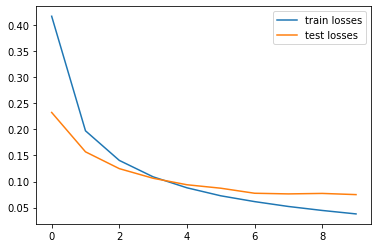

In [100]:
# Plot

plt.plot(train_losses, label='train losses')
plt.plot(test_losses, label='test losses')
plt.legend()
plt.show()

In [101]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[ 973    0    1    1    0    2    0    1    1    1]
 [   0 1123    4    0    0    1    2    2    3    0]
 [   6    0 1006    4    1    0    2    9    4    0]
 [   0    0    1  991    0    3    0    6    3    6]
 [   3    0    4    1  948    0    3    5    0   18]
 [   2    0    0    9    1  871    2    1    3    3]
 [  10    3    2    1    1    5  934    1    1    0]
 [   0    2    5    2    0    0    0 1013    2    4]
 [   9    0    3    7    5    8    3    7  925    7]
 [   5    2    0    3    3    3    0    4    0  989]]


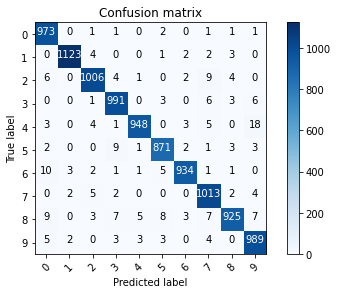

In [102]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs = inputs.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

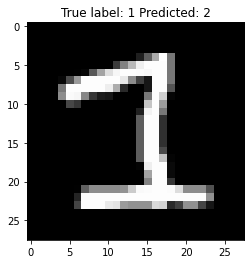

In [126]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])));